In [69]:
import torch
import torch.nn
from torch.autograd import Variable

In [70]:
import pandas as pd
import numpy as np

In [71]:
import matplotlib
import matplotlib.pyplot as plt

### load the iris data

In [72]:
df = pd.read_csv('/home/mike/iris', header=None, names=['var1', 'var2', 'var3', 'var4', 'target'])

In [73]:
y = [0]*50 +  [1]*50 + [2]*50
df['y'] = y

In [90]:
t = df[df.index%4>0]
v = df[df.index%4==0]

In [107]:
xt = t.iloc[:, 0:4]   ## training
yt = t.iloc[:, -1]
xv = v.iloc[:, 0:4]                              ## validation
yv = v.iloc[:, -1]

### model

In [108]:
model = torch.nn.Sequential(
    torch.nn.Linear(4, 12), 
    torch.nn.ReLU(),
    torch.nn.Linear(12, 6), 
    torch.nn.ReLU(),
    torch.nn.Linear(6, 3),
    torch.nn.Softmax(1),
)

In [109]:
model.cuda()

Sequential(
  (0): Linear(in_features=4, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=6, bias=True)
  (3): ReLU()
  (4): Linear(in_features=6, out_features=3, bias=True)
  (5): Softmax()
)

In [110]:
model

Sequential(
  (0): Linear(in_features=4, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=6, bias=True)
  (3): ReLU()
  (4): Linear(in_features=6, out_features=3, bias=True)
  (5): Softmax()
)

### prepare variables, or tensors

In [111]:
lr = 1e-4

In [112]:
Xt = Variable(torch.from_numpy(xt.astype(np.double).as_matrix()).float()).cuda()
Xv = Variable(torch.from_numpy(xv.astype(np.double).as_matrix()).float()).cuda()

In [113]:
Yt = Variable(torch.from_numpy(np.array(yt)).long(), requires_grad=False).cuda()
Yv = Variable(torch.from_numpy(np.array(yv)).long(), requires_grad=False).cuda()

### hyperparameters

In [116]:
epoch = 5000
lt = [0]*epoch      ## trace the training loss
lv = [0]*epoch      ## trace the validation loss

### loss and optimization functions

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=lr)
#optim = torch.optim.SGD(model.parameters(), lr=lr)

### train the model

In [119]:
for e in range(epoch):
    y_hat = model(Xt)
    l = loss(y_hat, Yt)
    lt[e] = l.data[0]
    optim.zero_grad()
    l.backward()
    optim.step()
    ## validate
    model.eval()
    pred = model(Xv)
    lv[e] = loss(pred, Yv).data[0]
    

### training, validation loss

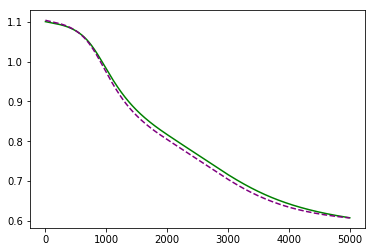

In [124]:
plt.plot(lt, color="green")
plt.plot(lv, color="purple", linestyle="dashed")

### validation accuracy

In [126]:
out = model(Xv)

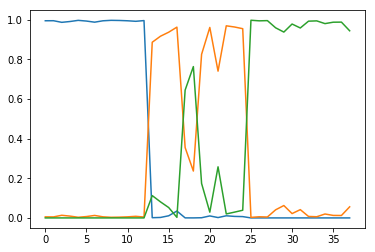

In [127]:
plt.plot(out.cpu().data.numpy())


In [128]:
_, pred = torch.max(out, 1)

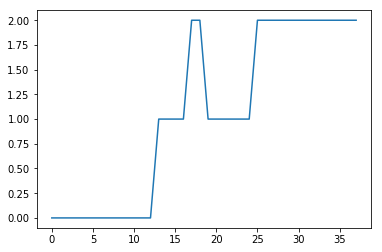

In [129]:
plt.plot(pred.cpu().data.numpy())

In [130]:
pred.cpu().data.numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])